Primary Eval

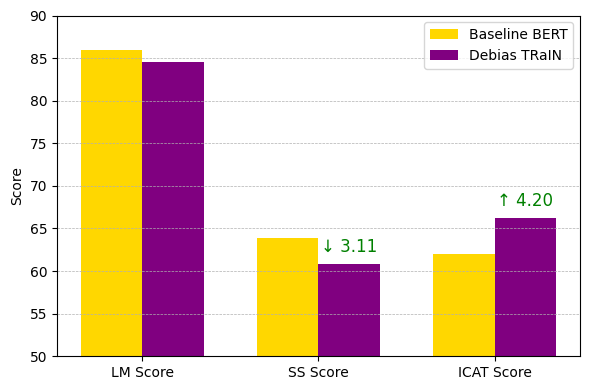

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data for gender category
metrics = ['LM Score', 'SS Score', 'ICAT Score']
baseline_values = [85.9688, 63.9302, 62.0176]
prefix_values = [84.4968, 60.8192, 66.2131]

# Calculate differences (prefix - baseline)
differences = [p - b for p, b in zip(prefix_values, baseline_values)]

# Plotting parameters
x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(6, 4))

# Plot bars
bars1 = ax.bar(x - width/2, baseline_values, width, label='Baseline BERT', color='gold')
bars2 = ax.bar(x + width/2, prefix_values, width, label='Debias TRaIN', color='purple')


# Set labels and title
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Score')
ax.set_ylim(50, 90)  # Scaled to emphasize differences

# Legend and grid
ax.legend()
ax.grid(True, axis='y', linestyle='--', linewidth=0.5)

# Add arrows and difference text for prefix bars (Discrete Prompt Prefix)
# ICAT: green up arrow above the prefix ICAT bar
ax.annotate(f'↑ {differences[2]:.2f}',
            xy=(x[2] + width/2, prefix_values[2] + 1),
            ha='center', va='bottom', fontsize=12, color='green')

# SS: green down arrow above the prefix SS bar
ax.annotate(f'↓ {abs(differences[1]):.2f}',
            xy=(x[1] + width/2, prefix_values[1] + 1),
            ha='center', va='bottom', fontsize=12, color='green')
plt.tight_layout()
plt.savefig('gender_comparison_bar_chart.png')  # Save for LaTeX inclusion
plt.show()


Comparison with Continuous Tuning

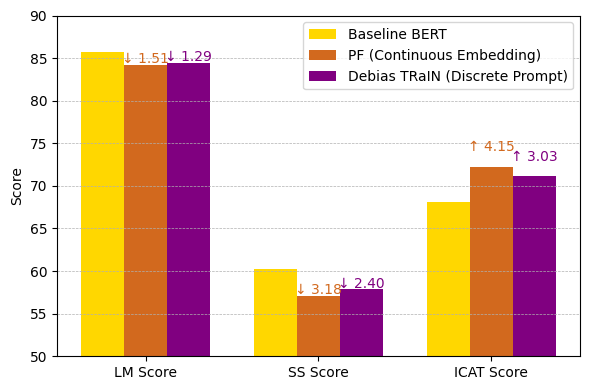

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['LM Score', 'SS Score', 'ICAT Score']
baseline = [85.7397, 60.2787, 68.1139]
base_paper = [84.2277, 57.0997, 72.2679]
our_method = [84.4505, 57.8763, 71.1473]

# Calculate changes relative to baseline
base_paper_diff = [bp - bl for bp, bl in zip(base_paper, baseline)]
our_method_diff = [om - bl for om, bl in zip(our_method, baseline)]

# Plotting parameters
x = np.arange(len(metrics))  # Label locations
width = 0.25  # Bar width for three groups

fig, ax = plt.subplots(figsize=(6, 4))

# Plot bars for baseline, base paper, and our method
bars1 = ax.bar(x - width, baseline, width, label='Baseline BERT', color='gold')
bars2 = ax.bar(x, base_paper, width, label='PF (Continuous Embedding)', color='chocolate')
bars3 = ax.bar(x + width, our_method, width, label='Debias TRaIN (Discrete Prompt)', color='purple')

# Add arrows and difference values on base paper and our method bars
for i in range(len(metrics)):
    # Continuous Tuning (base paper) annotations
    if base_paper_diff[i] >= 0:
        arrow = '↑'
        va = 'bottom'
    else:
        arrow = '↓'
        va = 'top'
    ax.annotate(f'{arrow} {abs(base_paper_diff[i]):.2f}',
                xy=(x[i], base_paper[i]),
                xytext=(0, 9),
                textcoords='offset points',
                ha='center', va=va, fontsize=10, color='chocolate')

    # Our Technique annotations
    if our_method_diff[i] >= 0:
        arrow = '↑'
        va = 'bottom'
    else:
        arrow = '↓'
        va = 'top'
    ax.annotate(f'{arrow} {abs(our_method_diff[i]):.2f}',
                xy=(x[i] + width, our_method[i]),
                xytext=(0, 9),
                textcoords='offset points',
                ha='center', va=va, fontsize=10, color='purple')

# Set labels and title
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Score')
ax.set_ylim(50, 90)  # Adjusted for the score ranges

# Legend and grid
ax.legend()
ax.grid(True, axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('base_comparison_diff_chart.png')  # Save for LaTeX inclusion
plt.show()


Fluency Constraints

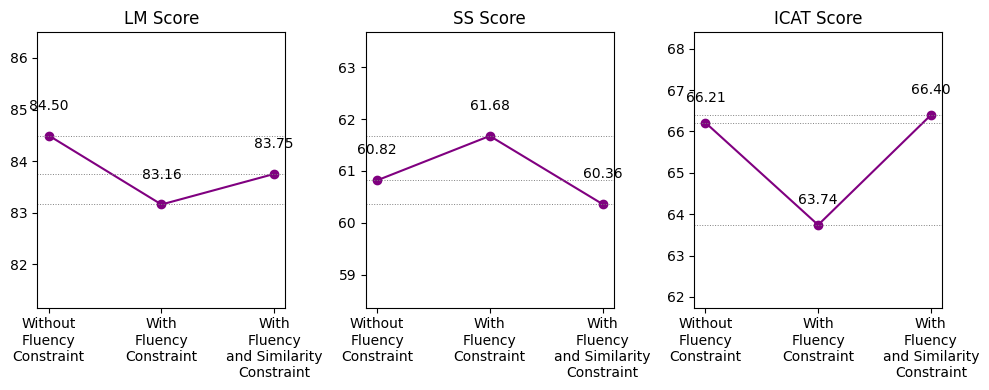

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

experiments = ['Without\nFluency\nConstraint', 'With\nFluency\nConstraint', 'With\nFluency\nand Similarity\nConstraint']

LM_scores = [84.4968, 83.1599, 83.7520]
SS_scores = [60.8192, 61.6762, 60.3613]
ICAT_scores = [66.2131, 63.7401, 66.3964]

x = np.arange(len(experiments))

fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=False)

metrics_data = [(LM_scores, 'LM Score'), (SS_scores, 'SS Score'), (ICAT_scores, 'ICAT Score')]

for ax, (data, label) in zip(axs, metrics_data):
    ax.plot(x, data, marker='o', color='purple')
    ax.set_xticks(x)
    ax.set_xticklabels(experiments)
    ax.set_title(label)
    ax.set_ylim(min(data) - 2, max(data) + 2)
    ax.grid(False)  # Remove vertical/horizontal grid
    # Add horizontal dotted lines for major ticks only
    score_vals = np.arange(int(min(data)//5*5), int(max(data)//5*5)+10, 5)
    for y_val in data:
        ax.axhline(y_val, linestyle='dotted', color='gray', linewidth=0.7)
    # Annotate each point with the value
    for i, v in enumerate(data):
        ax.text(x[i], v + 0.5, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('split_metrics_line_chart.png')
plt.show()


Other Bias Domains

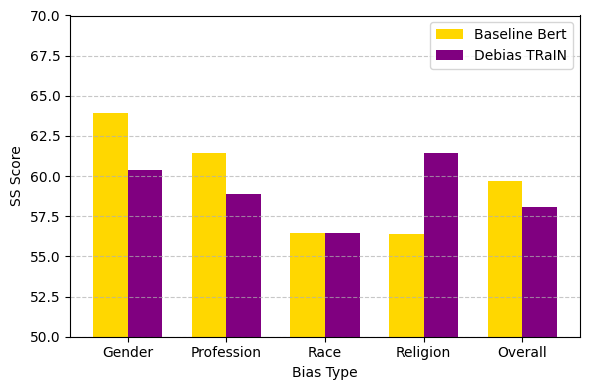

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Bias types for x-axis
bias_types = ['Gender', 'Profession', 'Race', 'Religion', 'Overall']

# Baseline SS scores
baseline_SS = [63.9, 61.44, 56.46, 56.4, 59.7]

# Discrete prompt SS scores
prefix_SS = [60.36, 58.9, 56.45, 61.42, 58.07]

# Positions
x = np.arange(len(bias_types))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))

# Plot columns
ax.bar(x - bar_width/2, baseline_SS, bar_width, label='Baseline Bert', color='gold')
ax.bar(x + bar_width/2, prefix_SS, bar_width, label='Debias TRaIN', color='purple')

# Labels and title
ax.set_xlabel('Bias Type')
ax.set_ylabel('SS Score')
ax.set_xticks(x)
ax.set_xticklabels(bias_types)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(50, 70)  # Scaled to emphasize differences

plt.tight_layout()
plt.savefig('BERT_SS_scores_column_chart.png')
plt.show()


GPT-2

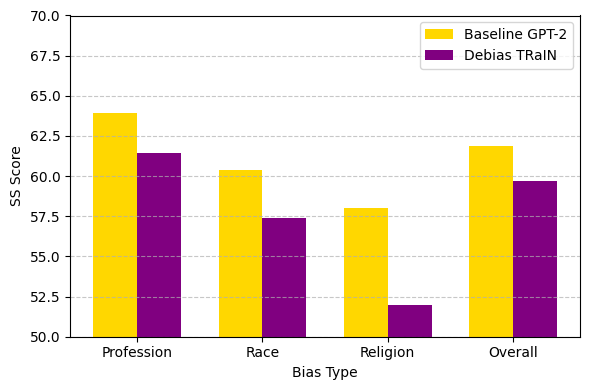

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Bias types for x-axis
bias_types = ['Profession', 'Race', 'Religion', 'Overall']

# Baseline SS scores
baseline_SS = [63.9, 60.35, 58.0, 61.9]

# Discrete prompt SS scores
prefix_SS = [61.44, 57.4, 52, 59.7]

# Positions
x = np.arange(len(bias_types))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))

# Plot columns
ax.bar(x - bar_width/2, baseline_SS, bar_width, label='Baseline GPT-2', color='gold')
ax.bar(x + bar_width/2, prefix_SS, bar_width, label='Debias TRaIN', color='purple')

# Labels and title
ax.set_xlabel('Bias Type')
ax.set_ylabel('SS Score')
ax.set_xticks(x)
ax.set_xticklabels(bias_types)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(50, 70)  # Scaled to emphasize differences

plt.tight_layout()
plt.savefig('GPT2_SS_scores_column_chart.png')
plt.show()


EXTRA GRAPHS

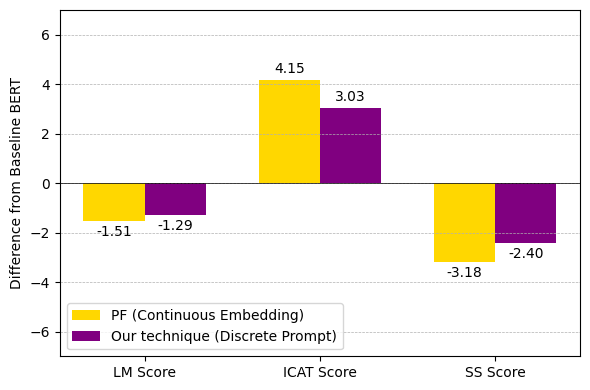

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['LM Score', 'ICAT Score', 'SS Score']
baseline = [85.7397, 68.1139, 60.2787]
base_paper = [84.2277, 72.2679, 57.0997]
our_method = [84.4505, 71.1473, 57.8763]

# Calculate differences from baseline
base_paper_diff = [bp - bl for bp, bl in zip(base_paper, baseline)]
our_diff = [om - bl for om, bl in zip(our_method, baseline)]

# Plotting parameters
x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(6, 4))

# Plot difference bars
bars1 = ax.bar(x - width/2, base_paper_diff, width, label='PF (Continuous Embedding)', color='gold')  # Sunflower yellow
bars2 = ax.bar(x + width/2, our_diff, width, label='Our technique (Discrete Prompt)', color='purple')

# Add value labels on bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3 if height > 0 else -3),  # Offset above/below
                textcoords="offset points",
                ha='center', va='bottom' if height > 0 else 'top')

# Set labels and title
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Difference from Baseline BERT')
ax.set_ylim(-7, 7)  # Scaled to show small differences clearly
ax.axhline(0, color='black', linewidth=0.5)  # Zero line for reference

# Legend and grid
ax.legend()
ax.grid(True, axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('base_comparison_diff_chart.png')  # Save for LaTeX inclusion
plt.show()
